In [3]:
import os, time, torch, warnings
warnings.filterwarnings("ignore")
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import datasets, transforms
from IPython.display import display

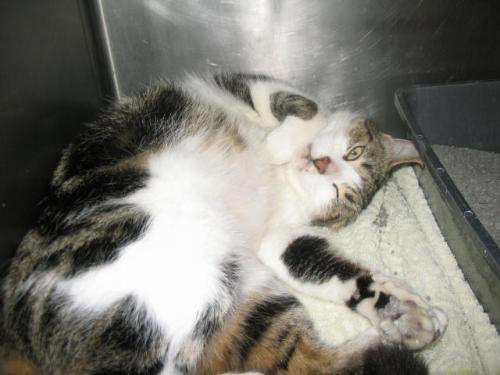

In [5]:
with Image.open("CATS_DOGS/test/CAT/10126.jpg") as img:
    display(img)

In [21]:
path = "CATS_DOGS"
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+"/"+img)

In [22]:
len(img_names)

24994

In [23]:
img_sizes = []
rejected = []

for image in img_names:
    try:
        with Image.open(image) as im:
            img_sizes.append(im.size)
    except:
        rejected.append(image)

In [24]:
len(img_sizes), len(rejected)

(24994, 0)

In [25]:
df = pd.DataFrame(img_sizes,columns=['width','height'])
df.head()

,width,height
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [26]:
df.width.describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: width, dtype: float64

In [27]:
df.height.describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: height, dtype: float64

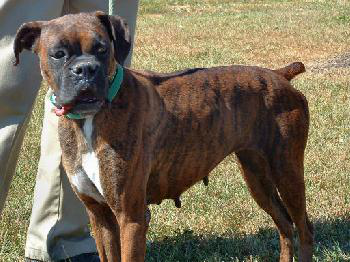

In [32]:
dog = Image.open("CATS_DOGS/test/DOG/10396.jpg")
display(dog)

In [33]:
dog.size

(350, 262)

In [35]:
dog.getpixel((0,0)) # 0 - 255

(245, 249, 250)

In [36]:
transform = transforms.Compose([
    transforms.ToTensor()
])

img = transform(dog)
print(type(img))
print(img.shape)

<class 'torch.Tensor'>
torch.Size([3, 262, 350])


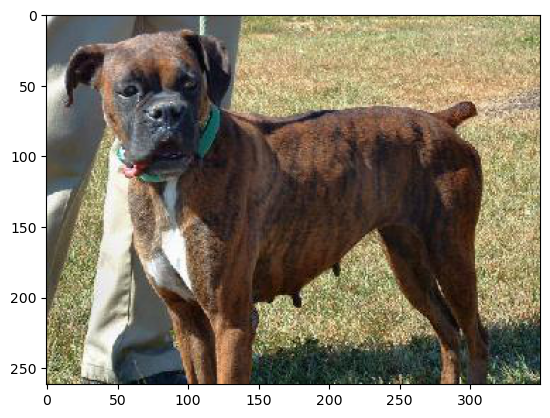

In [39]:
plt.imshow(np.transpose(img.numpy(),(1,2,0)));

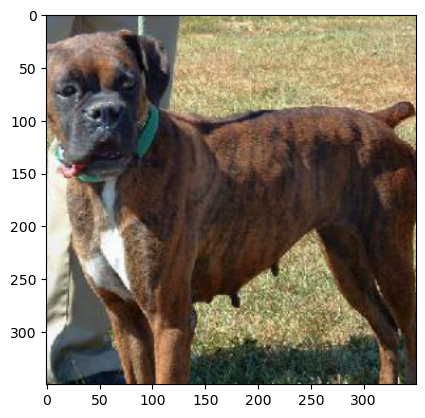

In [46]:
transform = transforms.Compose([
    transforms.Resize(350),
    transforms.CenterCrop(350),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(),(1,2,0)));

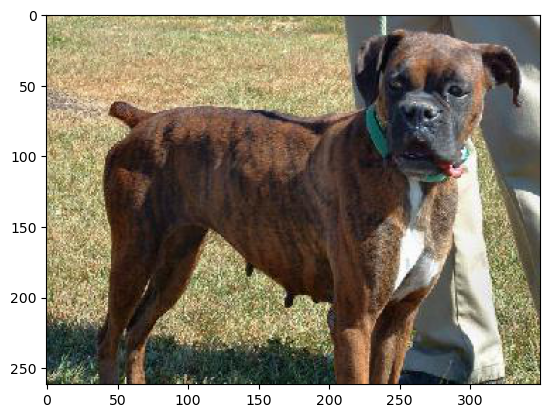

In [49]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(),(1,2,0)));

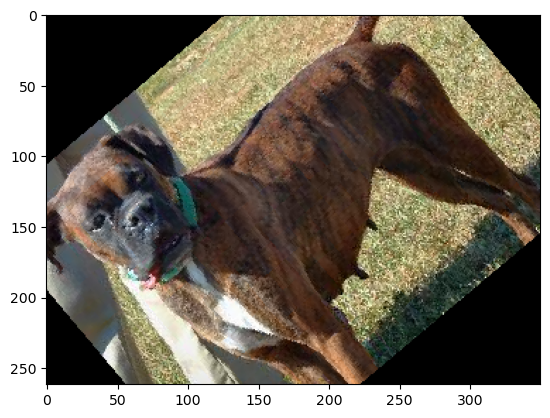

In [50]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(),(1,2,0)));

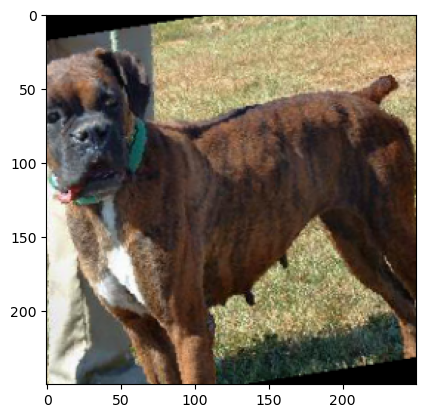

In [52]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=36),
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(),(1,2,0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


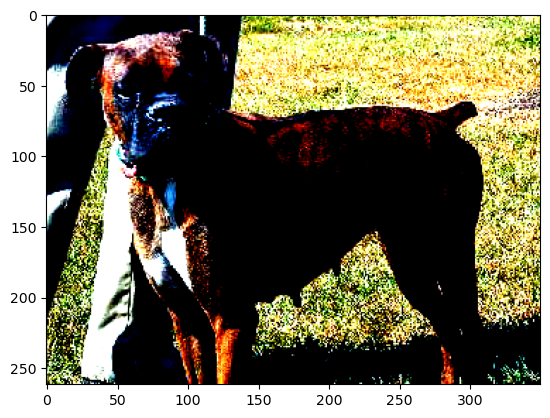

In [53]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(),(1,2,0)));

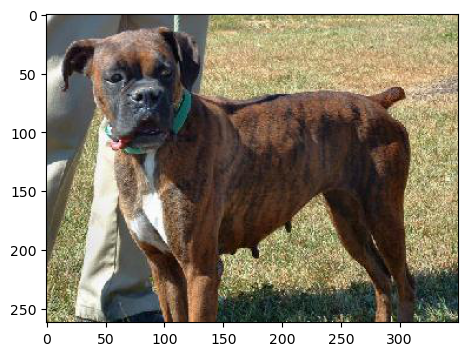

In [54]:
inv_normalized = transforms.Normalize(
        mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
        std=[1/0.229,1/0.224,1/0.225]
)

inv_img = inv_normalized(img)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(inv_img.numpy(),(1,2,0)));